In [31]:
import logging
from time import time

import numpy as np
from numpy.random import RandomState
rng = RandomState(0)

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition

import cv2
from random import shuffle

from sklearn.externals import joblib

In [32]:
posfilename = "positives_mod2.txt"
inputdirname = "CroppedDogs/"
posfile = open(posfilename,'r')
images = []
for line in posfile.readlines():
    infile = line.strip()
    img = cv2.resize(cv2.imread(infile), (128, 128), cv2.INTER_LINEAR)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.flatten()
    images.append(img)
shuffle(images)
img_array = np.array(images)
print img_array.shape

(11063, 49152)


In [33]:
img_array = np.divide(img_array,255.0)

In [40]:
n_components = 100
n_col = 5
n_row = 20
#image_shape = (128, 128)
image_shape = (128, 128,3)
estimators = [
    ('Eigenfaces - PCA using randomized SVD',
     decomposition.PCA(n_components=n_components, copy=False, svd_solver='arpack',
                       whiten=True),
     True),

#    ('Non-negative components - NMF',
#     decomposition.NMF(n_components=n_components, init='nndsvda', tol=5e-3),
#     False),

#    ('Independent components - FastICA',
#     decomposition.FastICA(n_components=n_components, whiten=True),
#     True),

#    ('Sparse comp. - MiniBatchSparsePCA',
#     decomposition.MiniBatchSparsePCA(n_components=n_components, alpha=0.8,
#                                      n_iter=100, batch_size=3,
#                                      random_state=rng),
#     True),

#    ('MiniBatchDictionaryLearning',
#        decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,
#                                                  n_iter=50, batch_size=3,
#                                                  random_state=rng),
#     True),

#    ('Cluster centers - MiniBatchKMeans',
#        MiniBatchKMeans(n_clusters=n_components, tol=1e-3, batch_size=20,
#                        max_iter=50, random_state=rng),
#     True),

#    ('Factor Analysis components - FA',
#     decomposition.FactorAnalysis(n_components=n_components, max_iter=2),
#     True),
]

In [41]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        comp = np.multiply(comp,255.0)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), 
                   interpolation='nearest')
#                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

Extracting the top 100 Eigenfaces - PCA using randomized SVD...
done in 154.675s


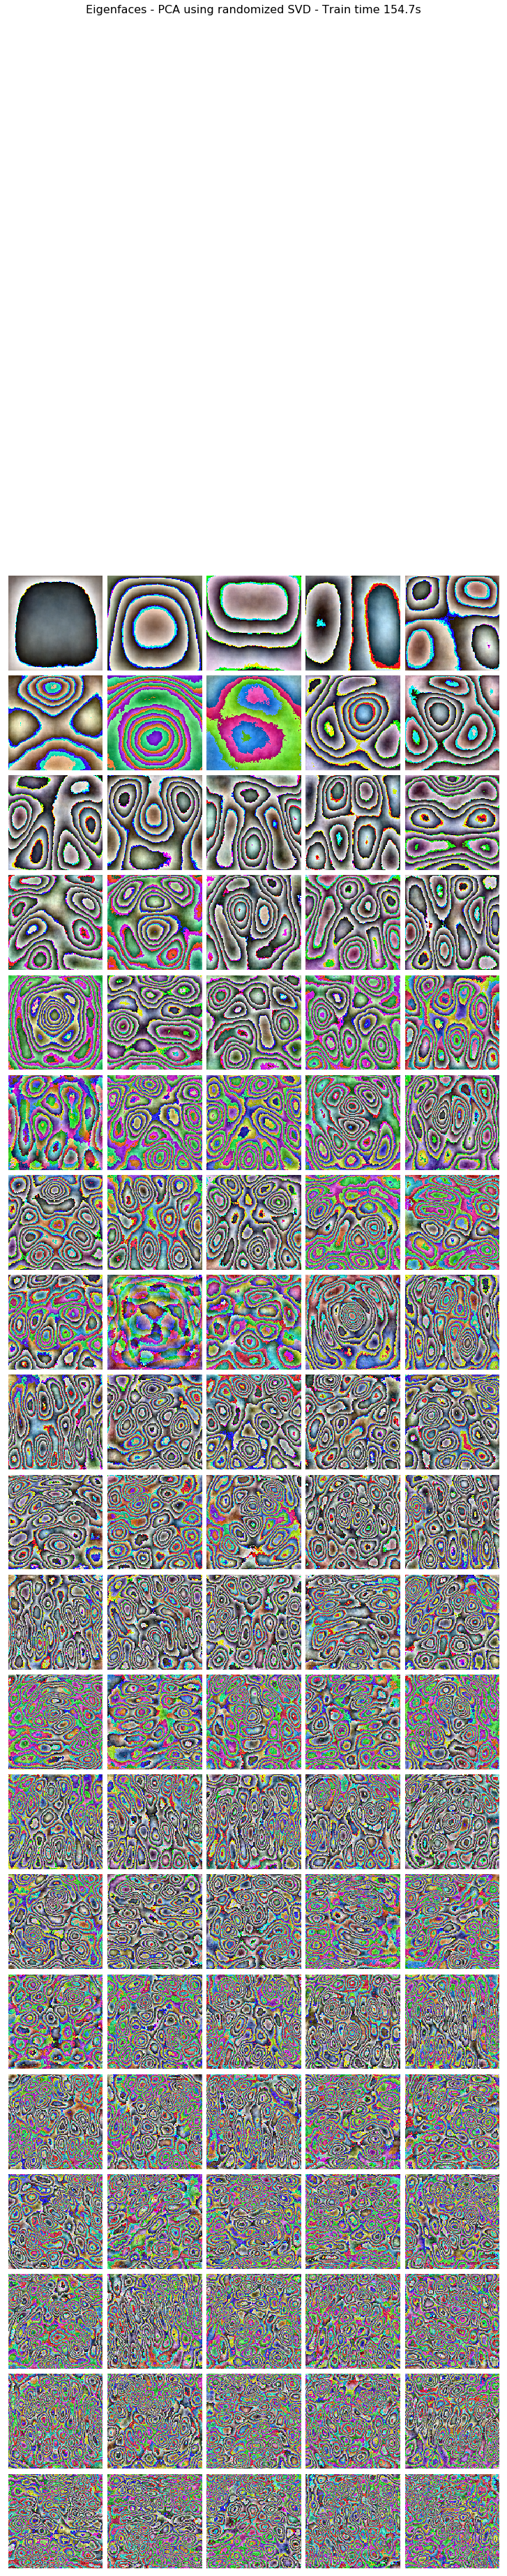

In [39]:
count = 0
for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = np.copy(img_array)
    estimator.fit(data)
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    if hasattr(estimator, 'cluster_centers_'):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_
    if (hasattr(estimator, 'noise_variance_') and
            estimator.noise_variance_.shape != ()):
        plot_gallery("Pixelwise variance",
                     estimator.noise_variance_.reshape(1, -1), n_col=1,
                     n_row=1)
    plot_gallery('%s - Train time %.1fs' % (name, train_time),
                 components_[:n_components])

    joblib.dump(estimator,"estimator_"+str(count)+"_"+str(len(images))+"_"+str(n_components)+".pkl")
    count += 1
